# Importación de Librerías y Carga de Datos

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dfgy_rest = pd.read_parquet('dfgy_rest.parquet')
dfgy_rest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274060 entries, 3 to 223484
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 274060 non-null  object        
 1   site_id                274060 non-null  object        
 2   name                   274060 non-null  object        
 3   state                  274060 non-null  object        
 4   city                   274060 non-null  object        
 5   postal_code            274060 non-null  object        
 6   price                  274060 non-null  float64       
 7   rating_avg             274060 non-null  float64       
 8   reviews_count          274060 non-null  int64         
 9   date_start             182440 non-null  datetime64[ns]
 10  year                   182440 non-null  float64       
 11  month                  182440 non-null  float64       
 12  state_city             274060 non-null  object   

In [4]:
dfgy_reviews = pd.read_parquet('dfgy_reviews.parquet')
dfgy_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5057754 entries, 0 to 4346286
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   source     object        
 1   site_id    object        
 2   user_id    object        
 3   datetime   datetime64[ns]
 4   month      int32         
 5   year       int32         
 6   rating     float64       
 7   polarity   float64       
 8   sentiment  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 347.3+ MB


In [5]:
dfgy_categories = pd.read_parquet('dfgy_categories.parquet')
dfgy_categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 741804 entries, 0 to 274996
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   source      741804 non-null  object
 1   site_id     741804 non-null  object
 2   categories  741804 non-null  object
dtypes: object(3)
memory usage: 22.6+ MB


In [6]:
dfgy_attributes = pd.read_parquet('dfgy_attributes.parquet')
dfgy_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1290917 entries, 3 to 1741961
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   site_id     1290917 non-null  object
 1   attributes  1290917 non-null  object
 2   source      1290917 non-null  object
dtypes: object(3)
memory usage: 39.4+ MB


# Análisis de correlaciones

In [7]:
dfgy_reviews_ = dfgy_reviews.groupby(['site_id']).agg({'rating': 'mean', 'polarity': 'mean', 'sentiment': 'mean'}).reset_index() 
dfgy_reviews_ = dfgy_reviews_.rename(columns={'rating': 'rating_avg_reviews', 'polarity':'polarity_avg', 'sentiment':'sentiment_avg'})
dfgy_reviews_

,site_id,rating_avg_reviews,polarity_avg,sentiment_avg
0,---kPU91CF4Lq2-WlRu9Lw,4.571429,0.897143,1.000000
1,--8IbOsAAxjKRoYsBFL-PA,2.500000,0.553600,1.000000
2,--ARBQr1WMsTWiwOKOj-FQ,5.000000,0.949350,1.000000
3,--MbOh2O1pATkXa7xbU6LA,3.625000,0.813963,1.000000
4,--SJXpAa0E-GCp2smaHf0A,2.333333,0.185300,0.333333
...,...,...,...,...
187009,zzjCxn89a7RQo8keIOO_Ag,1.666667,0.003333,0.333333
187010,zznJox6-nmXlGYNWgTDwQQ,1.500000,-0.263850,-1.000000
187011,zznZqH9CiAznbkV6fXyHWA,5.000000,0.933250,1.000000
187012,zzu6_r3DxBJuXcjnOYVdTw,3.000000,0.961500,1.000000


In [8]:
dfgy_categories_ = dfgy_categories.groupby(['site_id']).agg({'categories': 'count'}).reset_index() 
dfgy_categories_ = dfgy_categories_.rename(columns={'categories': 'categories_count'})
dfgy_categories_

,site_id,categories_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--8IbOsAAxjKRoYsBFL-PA,2
2,--ARBQr1WMsTWiwOKOj-FQ,2
3,--MbOh2O1pATkXa7xbU6LA,2
4,--SJXpAa0E-GCp2smaHf0A,2
...,...,...
297065,zzjCxn89a7RQo8keIOO_Ag,1
297066,zznJox6-nmXlGYNWgTDwQQ,2
297067,zznZqH9CiAznbkV6fXyHWA,3
297068,zzu6_r3DxBJuXcjnOYVdTw,2


In [9]:
dfgy_attributes_ = dfgy_attributes.groupby(['site_id']).agg({'attributes': 'count'}).reset_index() 
dfgy_attributes_ = dfgy_attributes_.rename(columns={'attributes': 'attributes_count'})
dfgy_attributes_

,site_id,attributes_count
0,---kPU91CF4Lq2-WlRu9Lw,18
1,--8IbOsAAxjKRoYsBFL-PA,17
2,--ARBQr1WMsTWiwOKOj-FQ,19
3,--MbOh2O1pATkXa7xbU6LA,6
4,--SJXpAa0E-GCp2smaHf0A,7
...,...,...
272159,zzjCxn89a7RQo8keIOO_Ag,4
272160,zznJox6-nmXlGYNWgTDwQQ,9
272161,zznZqH9CiAznbkV6fXyHWA,11
272162,zzu6_r3DxBJuXcjnOYVdTw,12


In [10]:
df_sites = dfgy_rest[['site_id', 'name', 'state', 'city', 'price', 'rating_avg', 'reviews_count']]
df_sites = pd.merge(df_sites, dfgy_reviews_, how='left', on=['site_id'])
df_sites = pd.merge(df_sites, dfgy_categories_, how='left', on=['site_id'])
df_sites = pd.merge(df_sites, dfgy_attributes_, how='left', on=['site_id'])
df_sites.sample(2)

,site_id,name,state,city,price,rating_avg,reviews_count,rating_avg_reviews,polarity_avg,sentiment_avg,categories_count,attributes_count
140206,0x88f279f8f8246a69:0x2e9ee3c85dc9196d,Dorethalicious Restaurant,GA,Albany,1.0,5.0,1,NaN,NaN,NaN,1.0,2.0
229178,0x87471c6735336b1b:0x792e893251e53433,Sabrosa,CO,Grand Junction,1.4,4.7,7,NaN,NaN,NaN,1.0,NaN


In [11]:
df_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274060 entries, 0 to 274059
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             274060 non-null  object 
 1   name                274060 non-null  object 
 2   state               274060 non-null  object 
 3   city                274060 non-null  object 
 4   price               274060 non-null  float64
 5   rating_avg          274060 non-null  float64
 6   reviews_count       274060 non-null  int64  
 7   rating_avg_reviews  182440 non-null  float64
 8   polarity_avg        182440 non-null  float64
 9   sentiment_avg       182440 non-null  float64
 10  categories_count    271294 non-null  float64
 11  attributes_count    248664 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 25.1+ MB


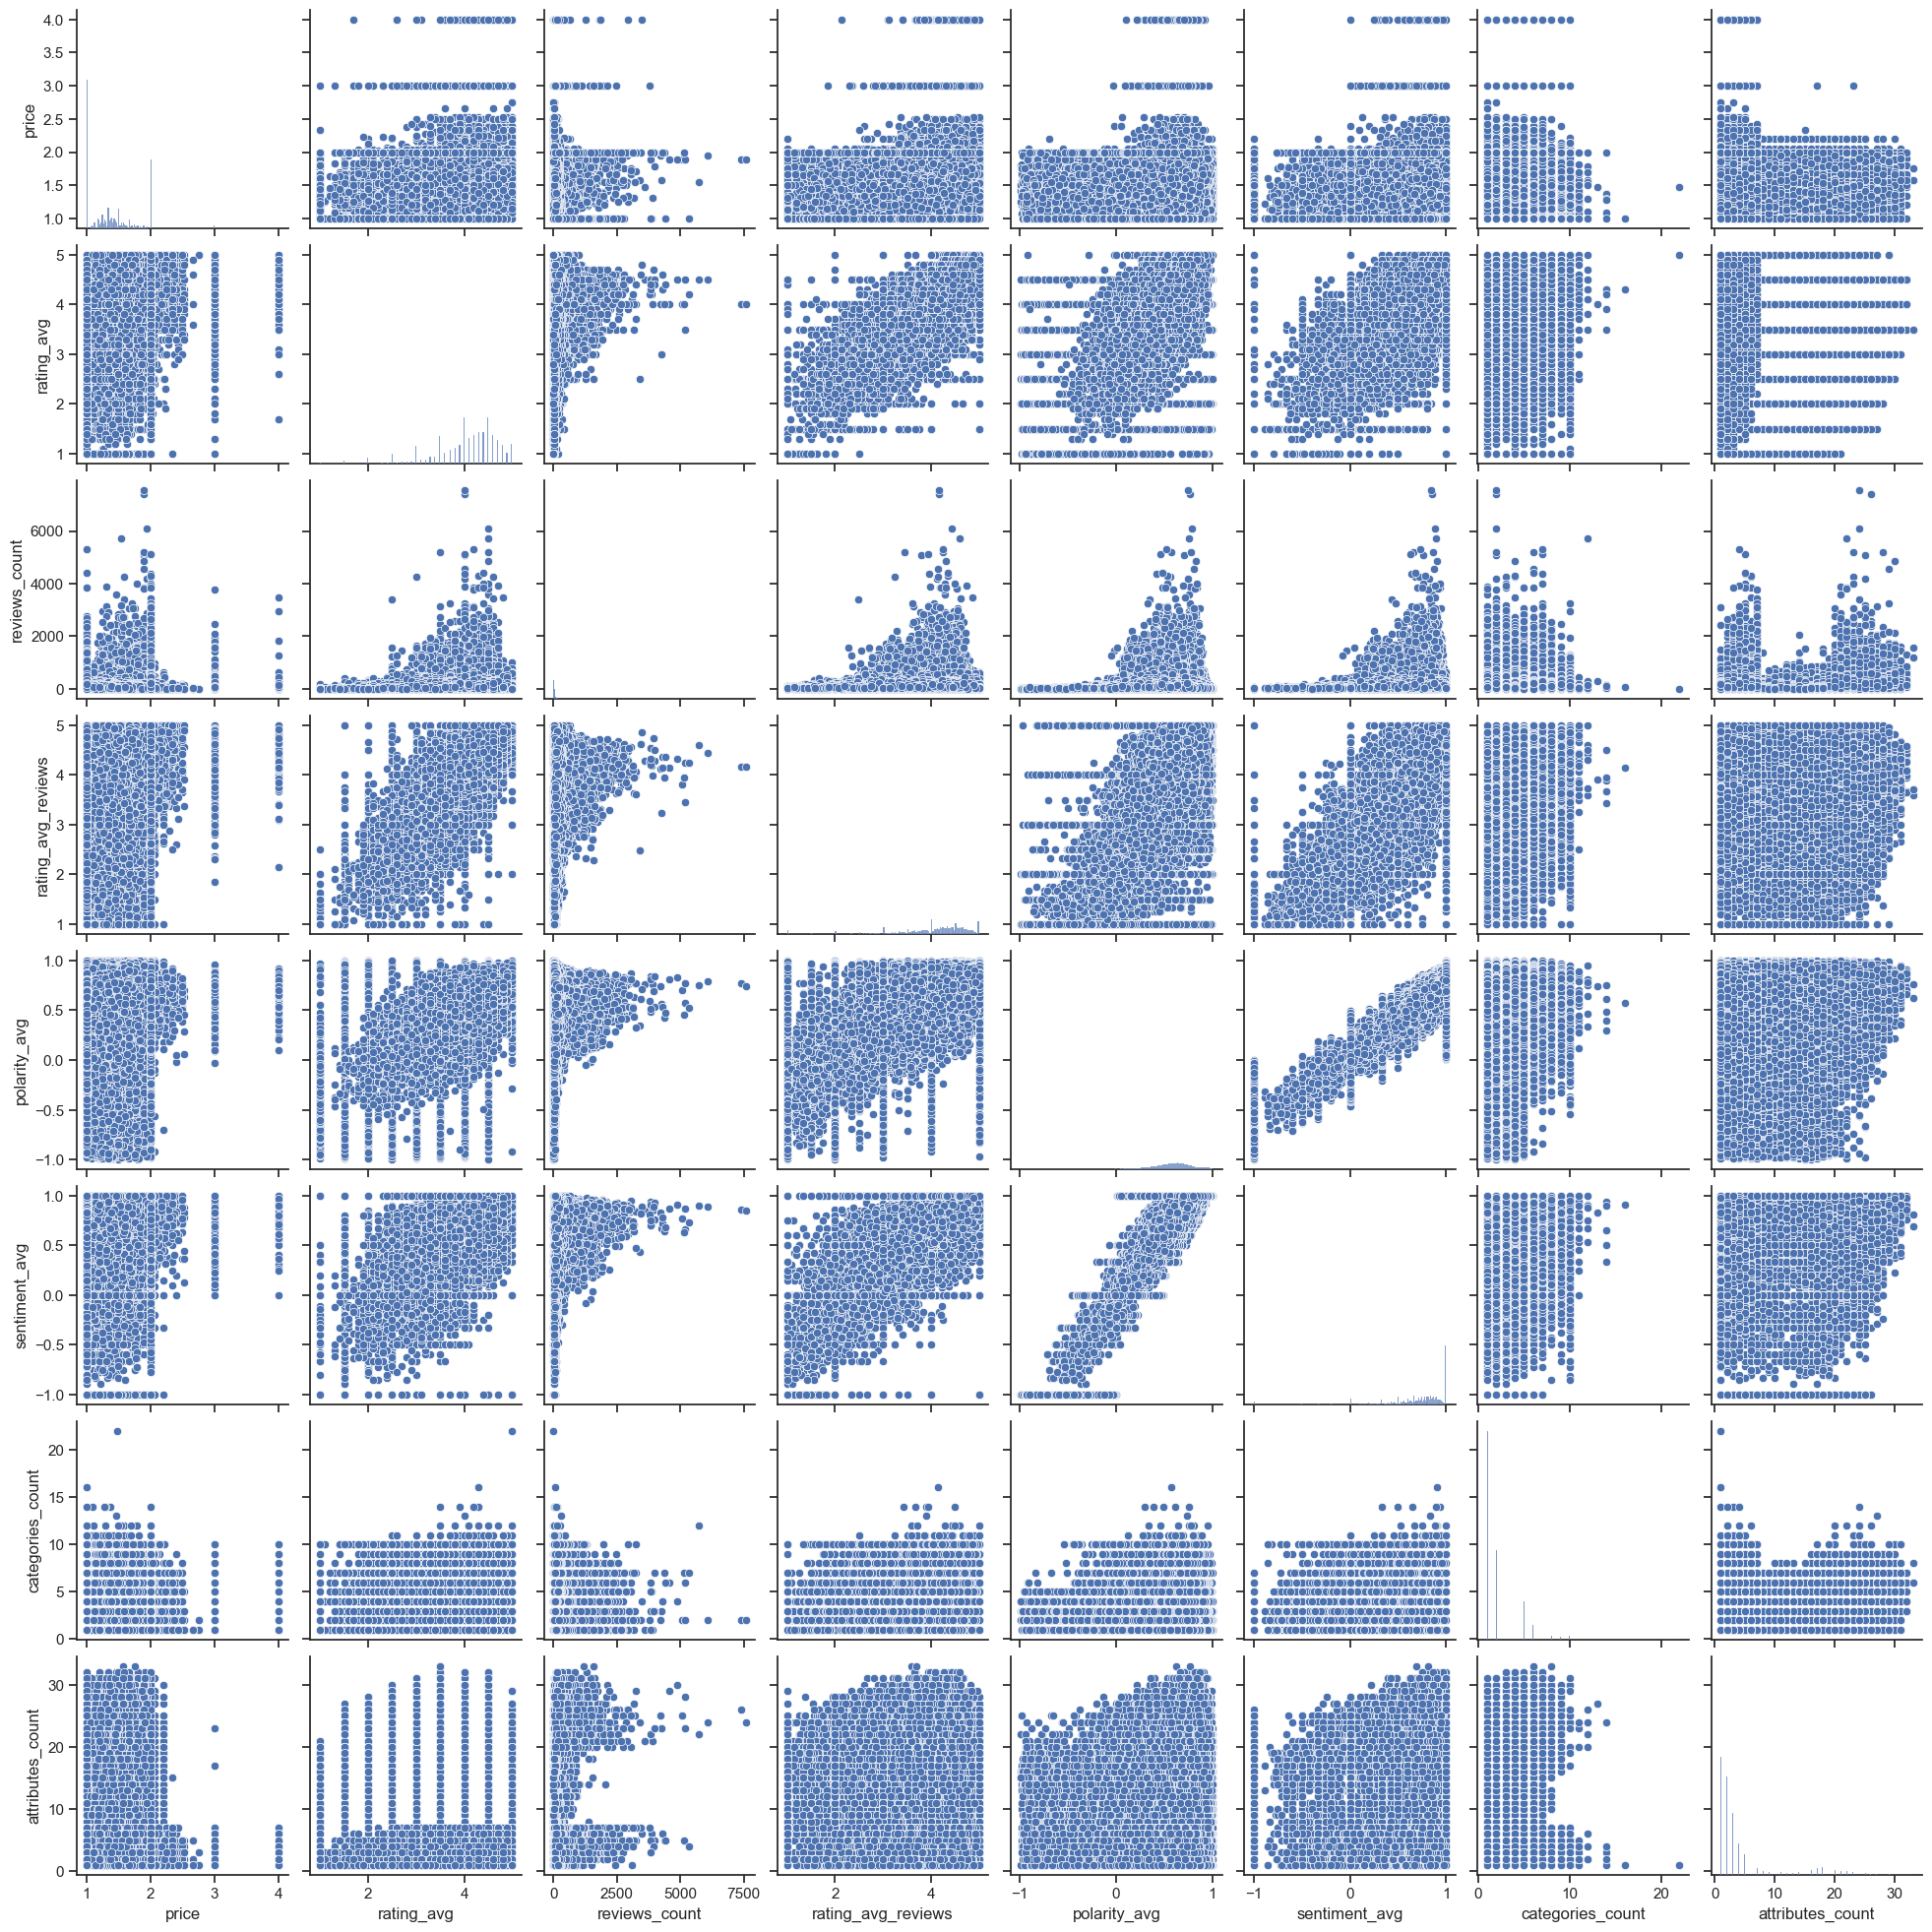

In [12]:
sns.set_theme(style="ticks")
sns.pairplot(df_sites)
plt.show()

In [13]:
corrmatrix_sites = df_sites[['price', 'rating_avg', 'reviews_count', 'rating_avg_reviews', 'polarity_avg', 'sentiment_avg', 'categories_count', 'attributes_count']].corr()
corrmatrix_sites

,price,rating_avg,reviews_count,rating_avg_reviews,polarity_avg,sentiment_avg,categories_count,attributes_count
price,1.000000,0.033161,0.042443,0.026011,0.122835,0.071318,-0.037600,0.072642
rating_avg,0.033161,1.000000,0.048400,0.842974,0.595505,0.630494,-0.126207,-0.292270
reviews_count,0.042443,0.048400,1.000000,0.056625,0.053297,0.053790,0.107919,0.183735
rating_avg_reviews,0.026011,0.842974,0.056625,1.000000,0.704268,0.732795,-0.087582,-0.308417
polarity_avg,0.122835,0.595505,0.053297,0.704268,1.000000,0.920977,-0.139563,0.083930
sentiment_avg,0.071318,0.630494,0.053790,0.732795,0.920977,1.000000,-0.122567,-0.089767
categories_count,-0.037600,-0.126207,0.107919,-0.087582,-0.139563,-0.122567,1.000000,0.046478
attributes_count,0.072642,-0.292270,0.183735,-0.308417,0.083930,-0.089767,0.046478,1.000000


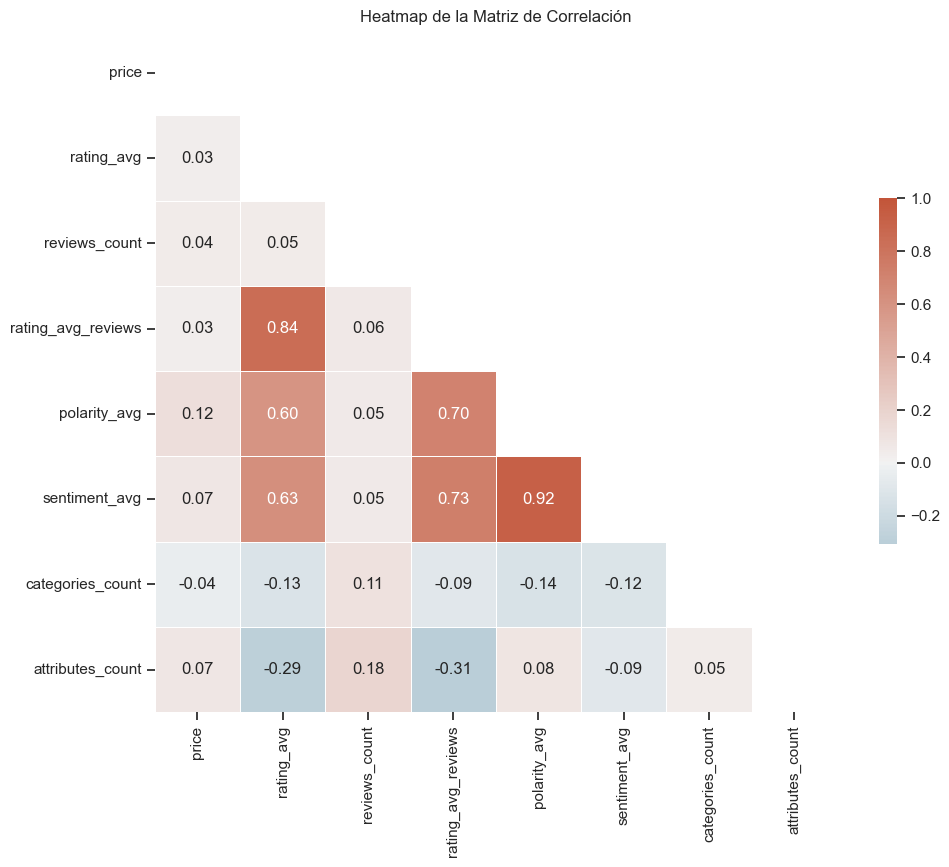

In [16]:
mask = np.triu(np.ones_like(corrmatrix_sites, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibujar el heatmap con la máscara y la proporción de aspecto correcta, incluyendo anotaciones de los valores
sns.heatmap(corrmatrix_sites, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title("Heatmap de la Matriz de Correlación")
plt.show()
